**Задача 2. Движение двух тел, гравитационно-взаимодействующих друг с другом**

In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container {width: 100%; !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 30)

pd.set_option('display.precision',3)

In [4]:
# Начальные координаты двух тел:
x1_0 = 0
y1_0 = 1
x2_0 = 0
y2_0 = 0

# Начальные относительные скорости двух тел м/с:
vx1_0 = 1
vy1_0 = 0
vx2_0 = 0
vy2_0 = 0

# Относительные массы тел кг:
m1 = 1
m2s = np.array([3, 10, 100, 1000])

# Размерность сетки:
n_grid = np.array([50, 100, 500])

In [5]:
coord = (x1_0, y1_0, x2_0, y2_0)
V = (vx1_0, vy1_0, vx2_0, vy2_0)

In [6]:
# Функция расчета значений численно

def model_result(c, Vs, mass1, mass2, n_gr):
    x1_, y1_, x2_, y2_ = c
    vx1_, vy1_, vx2_, vy2_ = Vs
    
    T = 30
    tau = T / (n_gr - 1)
    time = np.linspace(0, T, n_gr)
    
    Vx1 = np.zeros((2, n_gr), dtype=np.float32)
    Vy1 = np.zeros((2, n_gr), dtype=np.float32)
    Vx1[0, 0] = vx1_
    Vy1[0, 0] = vy1_
    
    Vx2 = np.zeros((2, n_gr), dtype=np.float32)
    Vy2 = np.zeros((2, n_gr), dtype=np.float32)
    Vx2[0, 0] = vx2_
    Vy2[0, 0] = vy2_
    
    Rx = np.zeros((2, n_gr), dtype=np.float32)
    Ry = np.zeros((2, n_gr), dtype=np.float32)
    Rx[0, 0] = (x2_ - x1_) / (((x1_ - x2_)**2 +
                               (y1_ - y2_)**2)**1.5)
    Ry[0, 0] = (y2_ - y1_) / (((x1_ - x2_)**2 +
                               (y1_ - y2_)**2)**1.5)

    X1 = np.zeros((2, n_gr), dtype=np.float32)
    Y1 = np.zeros((2, n_gr), dtype=np.float32)
    X1[0, 0] = x1_
    Y1[0, 0] = y1_
    
    X2 = np.zeros((2, n_gr), dtype=np.float32)
    Y2 = np.zeros((2, n_gr), dtype=np.float32)
    X2[0, 0] = x2_
    Y2[0, 0] = y2_
    
    for i in range(n-1):
        Vx1[1, i] = Vx1[0, i] + 0.5*tau*Rx[0, i]
        Vy1[1, i] = Vy1[0, i] + 0.5*tau*Ry[0, i]
        
        Vx2[1, i] = Vx2[0, i] + 0.5*tau*(mass1/mass2)*Rx[0, i]
        Vy2[1, i] = Vy2[0, i] + 0.5*tau*(mass1/mass2)*Ry[0, i]
        
        X1[1, i] = X1[0, i] + 0.5*tau*Vx1[0, i]
        X2[1, i] = X2[0, i] + 0.5*tau*Vx2[0, i]
        
        Y1[1, i] = Y1[0, i] + 0.5*tau*Vy1[0, i]
        Y2[1, i] = Y2[0, i] + 0.5*tau*Vy2[0, i]
        
        Rx[1, i] = (X2[1, i] - X1[1, i])/(((X2[1, i] - X1[1, i])**2 +
                                           (Y2[1, i] - Y1[1, i])**2)**1.5)
        Ry[1, i] = (Y2[1, i] - Y1[1, i])/(((X2[1, i] - X1[1, i])**2 +
                                           (Y2[1, i] - Y1[1, i])**2)**1.5)
        
        Vx1[0, i+1] = Vx1[0, i] + tau*Rx[1, i]
        Vy1[0, i+1] = Vy1[0, i] + tau*Ry[1, i]
        
        Vx2[0, i+1] = Vx2[0, i] - tau*(m1/m2)*Rx[1, i]
        Vy2[0, i+1] = Vy2[0, i] - tau*(m1/m2)*Ry[1, i]
        
        X1[0, i+1] = X1[0, i] + tau*Vx1[1, i]
        X2[0, i+1] = X2[0, i] + tau*Vx2[1, i]
        
        Y1[0, i+1] = Y1[0, i] + tau*Vy1[1, i]
        Y2[0, i+1] = Y2[0, i] + tau*Vy2[1, i]
        
        Rx[0, i+1] = (X2[0, i+1] - X1[0, i+1])/(((X2[0, i+1] - X1[0, i+1])**2 +
                                                 (Y2[0, i+1] - Y1[0, i+1])**2)**1.5)
        Ry[0, i+1] = (Y2[0, i+1] - Y1[0, i+1])/(((X2[0, i+1] - X1[0, i+1])**2 +
                                                 (Y2[0, i+1] - Y1[0, i+1])**2)**1.5)
    
    return time, X1[0, :], Y1[0, :], X2[0, :], Y2[0, :]

Построим графики траектории движения тел в зависимости от размера сетки и отношения масс:

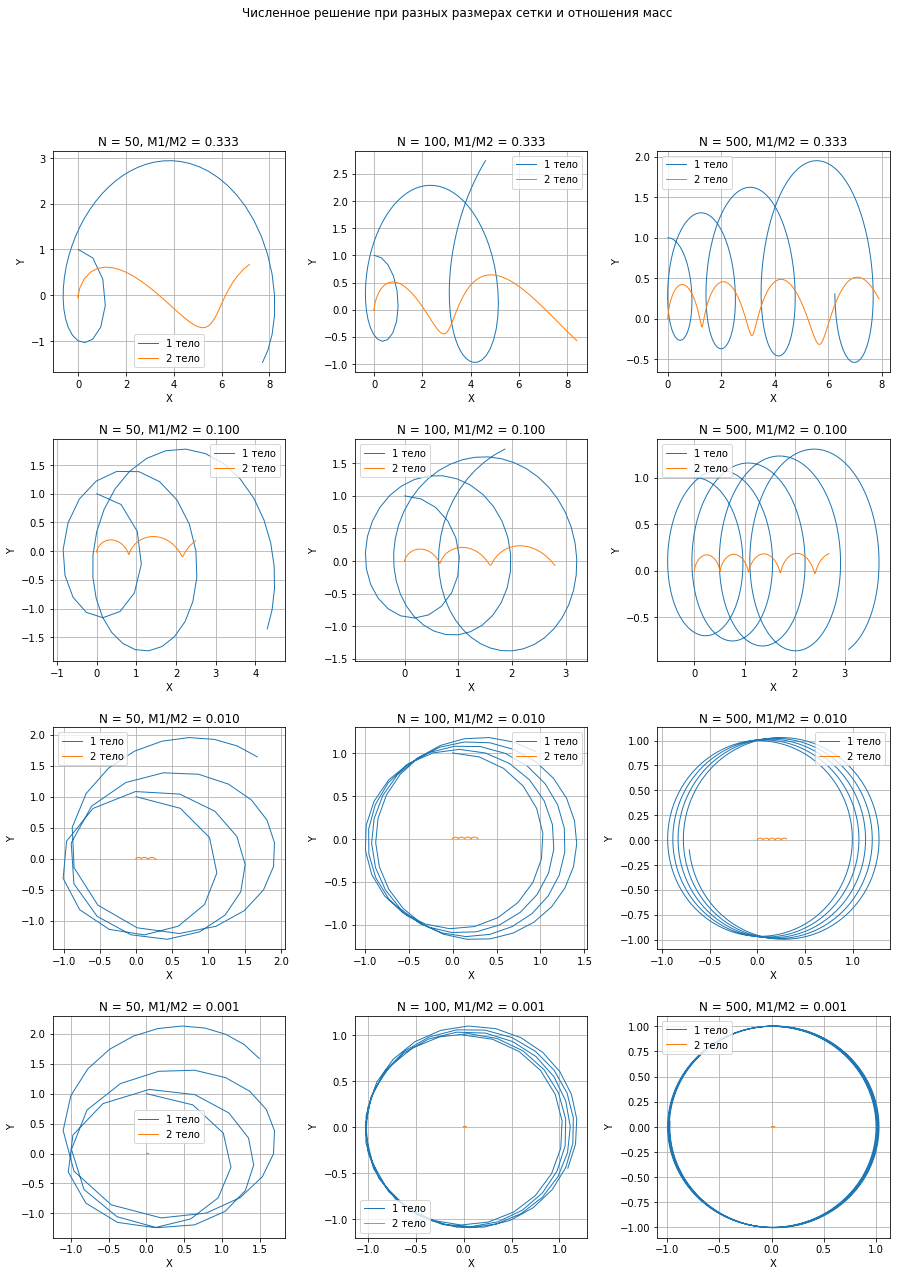

In [7]:
fig, axes = plt.subplots(4,3)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle("Численное решение при разных размерах сетки и отношения масс")

result = dict()
for i, m2 in enumerate(m2s):
    for j, n in enumerate(n_grid):
        axes[i, j].set_title('N = {0}, M1/M2 = {1:.3f}'.format(n, m1/m2))
        axes[i, j].set_xlabel('X')
        axes[i, j].set_ylabel('Y')
        axes[i, j].grid()
        
        t, x1, y1, x2, y2 = model_result(coord, V, m1, m2, n)

        axes[i, j].plot(x1, y1, lw=1,
                            label='1 тело')
        axes[i, j].plot(x2, y2, lw=1,
                            label='2 тело')
        axes[i, j].legend()
    
        feat_to_df = {'t': t,
                      'x1': x1,
                      'y1': y1,
                      'x2': x2,
                      'y2': y2}

        df_results = pd.DataFrame(feat_to_df)
        df_results.index = df_results.t
        df_results.drop(['t'], axis=1, inplace=True)
        result.update({(n, m1/m2): df_results})

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [25]:
# Результаты и погрешность численных вычислений:

for r in result:
    print('Размерность сетки: N = {0}\nСоотношение масс: M1/M2 = {1:.3f}\n{2}\n...'.format(r[0], r[1], result[r].head(3)))

Размерность сетки: N = 50
Соотношение масс: M1/M2 = 0.333
          x1     y1     x2     y2
t                                
0.000  0.000  1.000  0.000  0.000
0.612  0.612  0.813  0.000 -0.062
1.224  1.030  0.350  0.002  0.002
...
Размерность сетки: N = 100
Соотношение масс: M1/M2 = 0.333
          x1     y1         x2         y2
t                                        
0.000  0.000  1.000  0.000e+00  0.000e+00
0.303  0.303  0.954  0.000e+00 -1.530e-02
0.606  0.579  0.823  5.587e-05  1.192e-04
...
Размерность сетки: N = 500
Соотношение масс: M1/M2 = 0.333
        x1     y1         x2         y2
t                                      
0.00  0.00  1.000  0.000e+00  0.000e+00
0.06  0.06  0.998  0.000e+00 -6.024e-04
0.12  0.12  0.993  1.640e-08  1.818e-07
...
Размерность сетки: N = 50
Соотношение масс: M1/M2 = 0.100
          x1     y1         x2         y2
t                                        
0.000  0.000  1.000  0.000e+00  0.000e+00
0.612  0.612  0.813  0.000e+00 -1.874e-02
1.224 